## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

## Importing Dataset

In [3]:
startup_data=pd.read_csv('50_Startups.csv')

In [4]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup_data.shape

(50, 5)

## Data Understanding

### Initial Analysis

In [6]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Checking for Null Value

In [8]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Checking for Duplicated Value

In [9]:
startup_data[startup_data.duplicated()].shape

(0, 5)

In [10]:
startup_data[startup_data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [11]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [12]:
startup_data.drop(labels='State',axis=1,inplace=True)

In [13]:
data=startup_data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

In [14]:
data

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### Normality Test

C:\Users\EZHLIL MATHI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


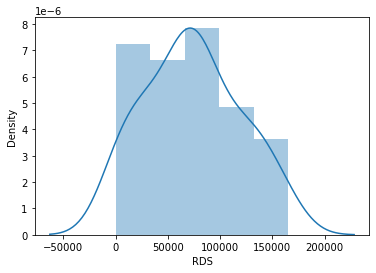

In [15]:
sns.distplot(a=data['RDS'],hist=True)
plt.show()

C:\Users\EZHLIL MATHI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


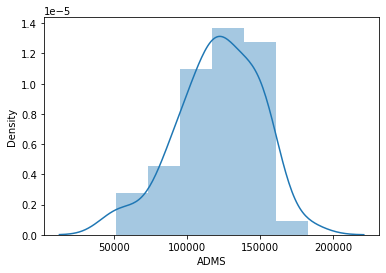

In [16]:
sns.distplot(a=data['ADMS'])
plt.show()

C:\Users\EZHLIL MATHI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


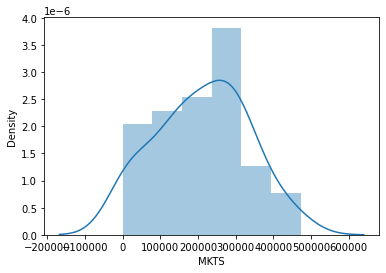

In [17]:
sns.distplot(a=data['MKTS'])
plt.show()

In [18]:
data.skew()

RDS       0.164002
ADMS     -0.489025
MKTS     -0.046472
Profit    0.023291
dtype: float64

__Observation__
 - skew within 0.5 is acceptable
 - Normality Test is passed

## Correlation Analysis

In [22]:
corr_matrix=data.corr()
corr_matrix

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


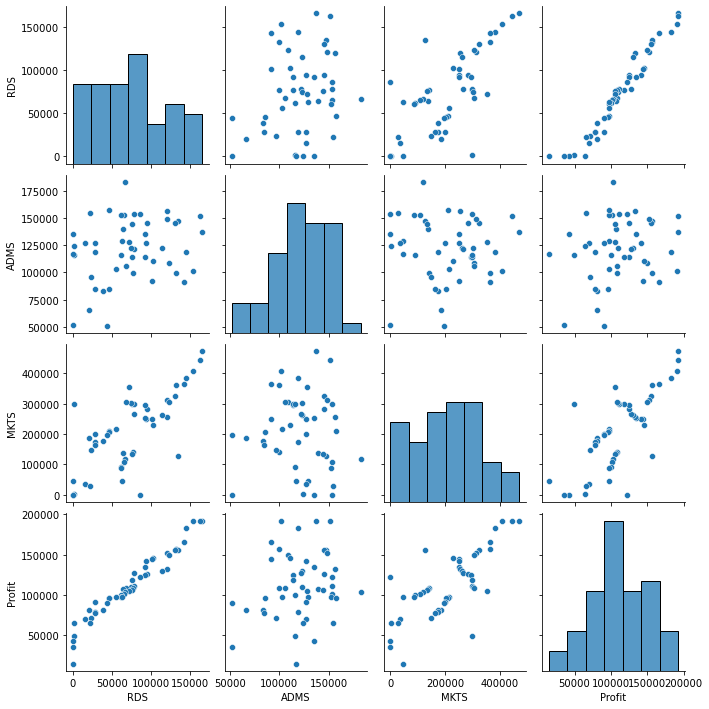

In [21]:
sns.pairplot(data)

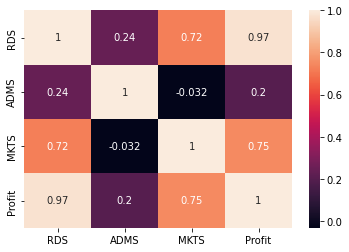

In [23]:
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

__Observation__
 - There is collinearity between Profit and R&D spend

### Model Building

In [20]:
x = data.drop(labels='Profit',axis=1)
y = data[['Profit']]

In [21]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
scaled_x = std_scalar.fit_transform(x)   ## it forms a array

In [22]:
scaled_x = pd.DataFrame(data=scaled_x,columns=['RDS','ADMS','MKTS'])

In [23]:
scaled_x.mean()

RDS     1.199041e-16
ADMS   -2.919887e-16
MKTS   -9.325873e-17
dtype: float64

In [24]:
scaled_x.std()

RDS     1.010153
ADMS    1.010153
MKTS    1.010153
dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.20,random_state=12)

In [27]:
x_train.shape,y_train.shape

((40, 3), (40, 1))

In [28]:
x_test.shape,y_test.shape

((10, 3), (10, 1))

### Model Training

In [29]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

### Model Testing

In [31]:
y_pred_train=linear_model.predict(x_train)
y_pred_test=linear_model.predict(x_test)

### Model Evaluation

In [32]:
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
mean_squared_error(y_train,y_pred_train)

82418806.1719844

In [34]:
mean_squared_error(y_test,y_pred_test)

69164516.23450814

In [35]:
r2_score(y_train,y_pred_train)

0.9485205028772792

In [36]:
r2_score(y_test,y_pred_test)

0.9497398332848893

### Model Optimization

In [37]:
frames = [scaled_x,y]
scaled_model = pd.concat(frames,axis=1)
scaled_model.head()

,RDS,ADMS,MKTS,Profit
0,2.016411,0.560753,2.153943,192261.83
1,1.955860,1.082807,1.923600,191792.06
2,1.754364,-0.728257,1.626528,191050.39
3,1.554784,-0.096365,1.422210,182901.99
4,1.504937,-1.079919,1.281528,166187.94


__Profit~RDS__

In [39]:
model_1= smf.ols(formula='Profit~RDS',data=scaled_model).fit()

In [40]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.50e-32
Time:                        06:42:38   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   1331.673     84.114      0.000    1.09e+05    1.15e+05
RDS         3.882e+04   1331.673     29.151      0.000    3.61e+04    4.15e+04
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model_1.pvalues

Intercept    8.831782e-54
RDS          3.500322e-32
dtype: float64

In [44]:
y1_pred=model_1.predict()

In [46]:
np.sqrt(mean_squared_error(y,y1_pred))

9226.100548285232

__Profit~RDS+ADMS__

In [47]:
model_2 = smf.ols(formula='Profit~RDS+ADMS',data=scaled_model).fit()

In [48]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           7.29e-31
Time:                        06:50:25   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   1329.588     84.246      0.000    1.09e+05    1.15e+05
RDS         3.918e+04   1370.304     28.589      0.000    3.64e+04    4.19e+04
ADMS       -1469.8924   1370.304     -1.073      0.289   -4226.588    1286.803
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model_1.pvalues

Intercept    8.831782e-54
RDS          3.500322e-32
dtype: float64

In [50]:
y2_pred=model_2.predict()

In [58]:
np.sqrt(mean_squared_error(y,y2_pred))

9115.197927536372

__Profit~RDS+ADMS+MKTS__

In [52]:
model_3 = smf.ols(formula='Profit~RDS+ADMS+MKTS',data=scaled_model).fit()

In [53]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        06:54:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+05   1305.649     85.791      0.000    1.09e+05    1.15e+05
RDS         3.661e+04   2051.533     17.846      0.000    3.25e+04    4.07e+04
ADMS        -743.7733   1415.345     -0.526      0.602   -3592.715    2105.168
MKTS        3296.2630   1991.607      1.655      0.105    -712.633    7305.159
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model_3.pvalues

Intercept    2.053195e-52
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64

In [56]:
y3_pred=model_3.predict()

In [57]:
np.sqrt(mean_squared_error(y,y3_pred))

8855.344489015144

_model_3 gives high r2_

## Model Validation

###  Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [59]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=scaled_model).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=scaled_model).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=scaled_model).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


 - None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

 ### Residual Analysis

C:\Users\EZHLIL MATHI\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


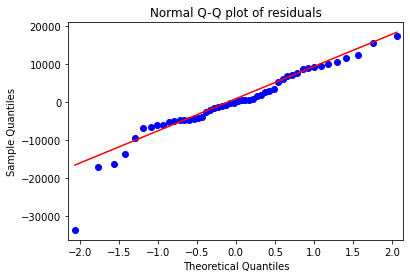

In [63]:
sm.qqplot(model_3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [64]:
def standard_values(vals) : 
    return (vals-vals.mean())/vals.std()

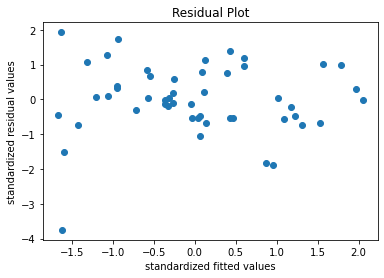

In [65]:
plt.scatter(standard_values(model_3.fittedvalues),standard_values(model_3.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

## Model Deletion Diagnostics (checking Outliers or Influencers)

### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [67]:
influenced_model = model_3.get_influence()
c,_ = influenced_model.cooks_distance

<StemContainer object of 3 artists>

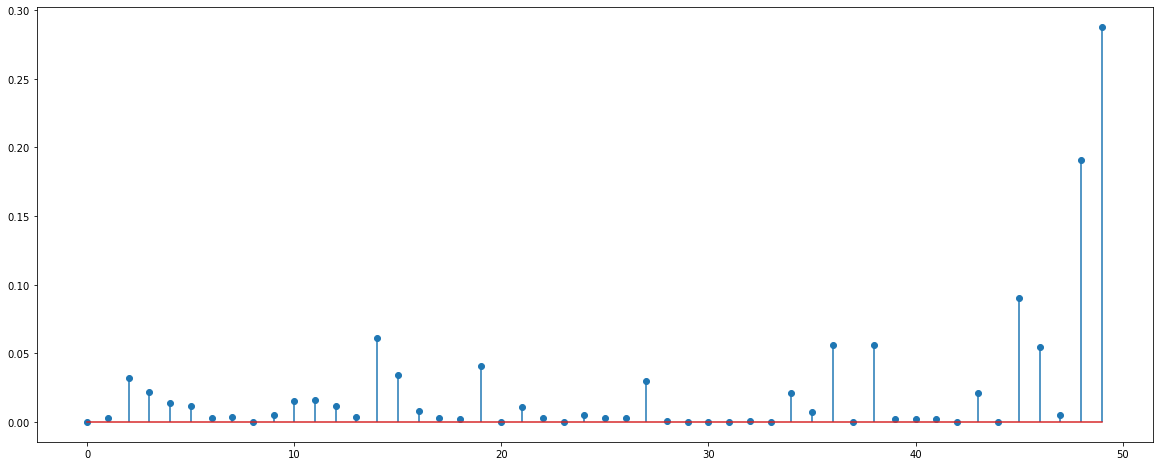

In [69]:
# Plot the influencers using the stem plot
fig_cook=plt.figure(figsize=(20,8))
plt.stem(np.arange(len(startup_data)),np.round(c,3))

In [70]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432656)

__Cook's distance clearly shows that 49 is an outlier__

### High Influence Point

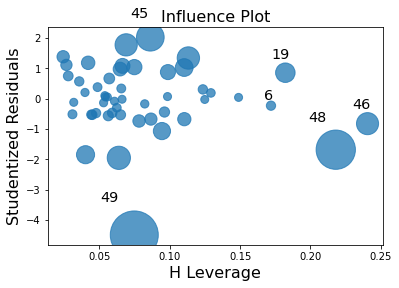

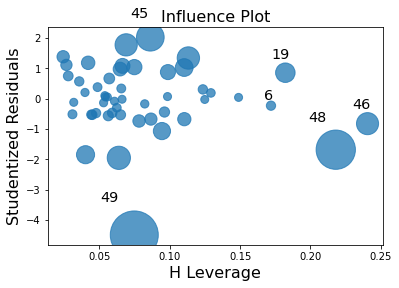

In [71]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_3)

In [72]:
k=startup_data.shape[1]
n=startup_data.shape[0]
leverage_cutoff=3*((k +1)/n)
leverage_cutoff

0.30000000000000004

In [73]:
new_data = startup_data
new_data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [74]:
new_data = new_data.drop(new_data.index[49])
new_data = new_data.drop(new_data.index[48])
new_data = new_data.drop(new_data.index[46])
new_data = new_data.drop(new_data.index[45])
new_data = new_data.drop(new_data.index[14]).reset_index()

In [75]:
startup_data.shape,new_data.shape

((50, 4), (45, 5))

In [76]:
x1 = new_data.drop(labels='Profit',axis=1)
y1 = new_data[['Profit']]
x1.drop(labels='index',axis=1,inplace=True)

In [77]:
scaled_x1 =std_scalar.fit_transform(x1)

In [78]:
scaled_x1 = pd.DataFrame(data=scaled_x1,columns=['rd_spend','administration','marketing_spend'])

In [79]:
frames1 = [scaled_x1,y1]

In [80]:
scaled_model1 = pd.concat(frames1,axis=1)

## Final Model

In [81]:
final_model = smf.ols('Profit ~ rd_spend + administration + marketing_spend',data=scaled_model1).fit()

In [82]:
final_model.rsquared,final_model.aic

(0.9670227733633301, 924.7318623888405)

In [83]:
final_model = smf.ols('Profit ~ rd_spend + marketing_spend',data=scaled_model1).fit()

In [84]:
final_model.rsquared,final_model.aic

(0.9662676572045729, 923.7506571087546)

In [85]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     601.5
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.23e-31
Time:                        07:32:29   Log-Likelihood:                -458.88
No. Observations:                  45   AIC:                             923.8
Df Residuals:                      42   BIC:                             929.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.179e+05   1001.702    117.650      0.000    1.16e+05     1.2e+05
rd_spend         3.194e+04   1457.537     21.912      0.000     2.9e+04    3.49e+04
marketing_spend  3734.7252   1457.537      2.562      0.014     793.297    6676.153
==============================================================================
Omnibus:                        0.199   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.389
Skew:                           0.100   Prob(JB):                        0.823
Kurtosis:                       2.591   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""